In [732]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


#First we must import all necessary libraries

In [808]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,1,0.375,3,D
1,462643,0,1,38,1,2,NaN,2,0.250,3,A
2,466315,0,1,67,1,2,1.0,1,0.000,5,B
3,461735,1,1,67,1,7,0.0,3,0.125,5,B
4,462669,0,1,40,1,3,NaN,3,0.625,5,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,-1,0.0,1,0.750,0,D
8064,464685,1,0,35,0,4,3.0,1,0.375,3,D
8065,465406,0,0,33,1,5,1.0,1,0.000,5,D
8066,467299,0,0,27,1,5,1.0,1,0.375,5,B


###Next we need to import our data

In [ ]:
train = pd.read_csv("Train_tesla.csv")
test = pd.read_csv("Test_tesla.csv")

###After importing our data we must clean our data utilizing different methods to convert categorical data into numerical data

In [ ]:
spending_score_mapping = {'High': 3, 'Average': 2, 'Low': 1}

train['Spending_Score'] = train['Spending_Score'].map(spending_score_mapping)

train['Family_Size'] = (train['Family_Size'] - train['Family_Size'].min()) / (train['Family_Size'].max() - train['Family_Size'].min())

cat_columns = ['Gender', 'Graduated', 'Profession', 'Ever_Married', 'Var_1']

for col in cat_columns:
  train[col] = pd.Categorical(train[col])
  train[col] = train[col].cat.codes
train.to_csv('train_tesla_cat.csv', index = False)

train

###Fill the NaN values with the mode or mean depending on if it is categorical or a numeric column

In [809]:
numerical_columns = ['Family_Size','Ever_Married','Graduated','Work_Experience']

categorical_columns = ['Profession', 'Var_1']

for col in numerical_columns:
  train[col].fillna(train[col].mean(), inplace = True)

for col in categorical_columns:
  train[col].fillna(train[col].mode(), inplace = True)

scaler = MinMaxScaler()

numerical_columns2 = ['Age', 'Work_Experience', 'Spending_Score']
train[numerical_columns2] = scaler.fit_transform(train[numerical_columns2])


train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,0.056338,0,5,0.071429,0.0,0.375,3,D
1,462643,0,1,0.281690,1,2,0.188690,0.5,0.250,3,A
2,466315,0,1,0.690141,1,2,0.071429,0.0,0.000,5,B
3,461735,1,1,0.690141,1,7,0.000000,1.0,0.125,5,B
4,462669,0,1,0.309859,1,3,0.188690,1.0,0.625,5,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,0.056338,0,-1,0.000000,0.0,0.750,0,D
8064,464685,1,0,0.239437,0,4,0.214286,0.0,0.375,3,D
8065,465406,0,0,0.211268,1,5,0.071429,0.0,0.000,5,D
8066,467299,0,0,0.126761,1,5,0.071429,0.0,0.375,5,B


###Now we must split the training data into x and y

In [810]:
y = train['Segmentation']
X = train.drop(['Segmentation','ID'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state= 42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_val.shape}")

X_train shape: (6454, 9)
X_test shape: (1614, 9)
y_train shape: (6454,)
y_test shape: (1614,)


###After splitting the data we utilize our GradientBoostingClassifier to check how accurate our model is

In [821]:
model = GradientBoostingClassifier(n_estimators=96, learning_rate=0.1, max_depth=3, random_state=42,
                                   warm_start = True)

model.fit(X_train, y_train)

y_predicted = model.predict(X_val)

accuracy = accuracy_score(y_val, y_predicted) *100
print(f"Accuracy: {accuracy:.2f} %")
print(classification_report(y_val, y_predicted))

Accuracy: 54.03 %
              precision    recall  f1-score   support

           A       0.44      0.44      0.44       391
           B       0.45      0.36      0.40       369
           C       0.56      0.57      0.56       380
           D       0.65      0.74      0.69       474

    accuracy                           0.54      1614
   macro avg       0.52      0.53      0.52      1614
weighted avg       0.53      0.54      0.53      1614



###Now we can put our results into a more comprehensive graph to see where we have made our mistakes

In [738]:
cm = confusion_matrix(y_val, y_predicted)
cm

array([[171,  74,  53,  93],
       [ 87, 134, 107,  41],
       [ 43,  68, 217,  52],
       [ 89,  23,  12, 350]])

Text(95.72222222222221, 0.5, 'Truth')

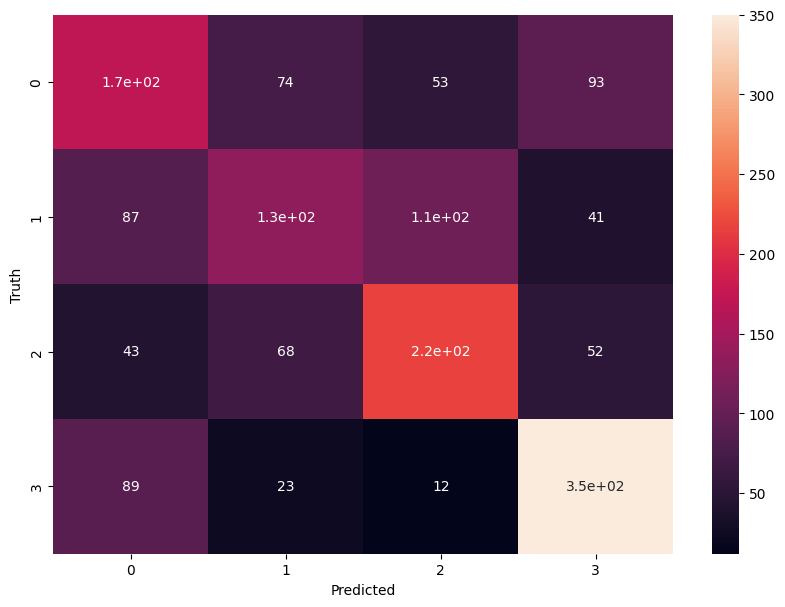

In [739]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Test Data

###After we have completed our training we must apply the same preprocesses to our new data for segmentation

In [741]:
spending_score_mapping = {'High': 3, 'Average': 2, 'Low': 1}

test['Spending_Score'] = test['Spending_Score'].map(spending_score_mapping)

test['Family_Size'] = (test['Family_Size'] - train['Family_Size'].min()) / (train['Family_Size'].max() - train['Family_Size'].min())

cat_columns = ['Gender', 'Graduated', 'Profession', 'Ever_Married', 'Var_1']

for col in cat_columns:
  test[col] = pd.Categorical(test[col])
  test[col] = test[col].cat.codes

numerical_columns = ['Family_Size','Ever_Married','Work_Experience', 'Age']

categorical_columns = ['Profession', 'Var_1', 'Gender','Graduated', 'Spending_Score' ]

for col in numerical_columns:
  test[col].fillna(train[col].mean(), inplace = True)

for col in categorical_columns:
  test[col].fillna(train[col].mode(), inplace = True)

scaler = MinMaxScaler()

numerical_columns2 = ['Age', 'Work_Experience']
test[numerical_columns2] = scaler.fit_transform(test[numerical_columns2])

test = test.round(0)

model = GradientBoostingClassifier(n_estimators=96, learning_rate=0.1, max_depth=3, random_state=42,
                                   warm_start = True)
model.fit(X_train, y_train)

final_hackathon = model.predict(test.drop(['ID'], axis=1, errors='ignore'))

final_hackathon = pd.DataFrame({
    "ID": test["ID"],
    "Segmentation": final_hackathon
})

final_hackathon.to_csv('final_hackathon2.csv', index=False)